<a href="https://colab.research.google.com/github/Daiyan-Zubaier/Stock-Price-Predictor/blob/prepare-data/stock_predictor_daiyan___rajit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/jinglescode/time-series-forecasting-pytorch

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# To fetch stock market data
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

print("All libraries loaded")

All libraries loaded


# Configuration Settings
Configures settings for libraries in a 2D hashmap


In [ ]:
config = {
    #Collects stock price data
    "alpha_vantage": {
        "key": "CX2NAREQLV2VVYIV",
        "symbol": "IBM",
        # Or use Compact for last 100 days
        "outputsize": "full",
        "key_adjusted_close": "4. close",
    },
    #Data preprocessing settings
    "data": {
        # number of past days to predict next price
        "window_size": 20,
        # 80% for training, 20% for testing
        "train_split_size": 0.80,
    },
    # Plotting settings
    "plots": {
        # Show data label every x days
        "xticks_interval": 90,
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    },
    # LSTM NN Settings
    "model": {
        # Number of features
        "input_size": 1,
        "num_lstm_layers": 2,
        "lstm_size": 32,
        # Disables neurons
        "dropout": 0.2,
    },
    "training": {
        "device": "cpu",
        "batch_size": 64,
        # Train for x cycles
        "num_epoch": 100,
        "learning_rate": 0.01,
        # Decreasing lr every x epochs
        "scheduler_step_size": 40,
    }
}

Number data points 6357 from 1999-11-01 to 2025-02-07
[ 96.75  94.81  94.37 ... 263.3  253.44 252.34]


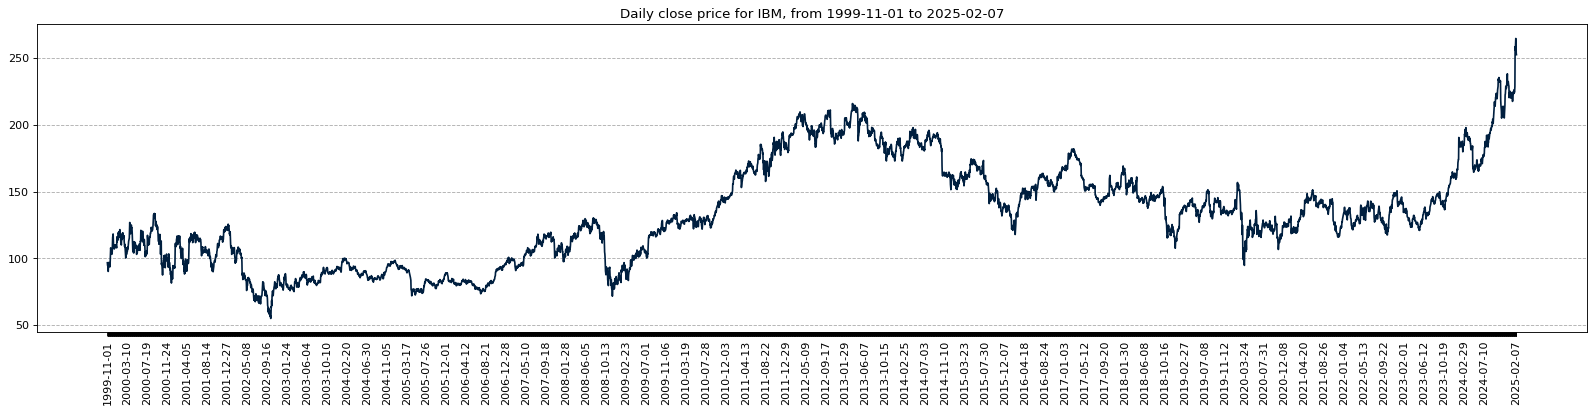

In [ ]:
import requests

def download_data(config):
    url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': config["alpha_vantage"]["symbol"],
        'outputsize': config["alpha_vantage"]["outputsize"],
        'apikey': config["alpha_vantage"]["key"]
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Error Message" in data:
        raise ValueError(data["Error Message"])

    # Extract data
    data_date = list(data['Time Series (Daily)'].keys())
    data_date.reverse()

    data_close_price = [float(data['Time Series (Daily)'][date]['4. close']) for date in data['Time Series (Daily)'].keys()]
    data_close_price.reverse()
    data_close_price = np.array(data_close_price)

    num_data_points = len(data_date)
    display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points - 1]
    print("Number data points", num_data_points, display_date_range)

    return data_date, data_close_price, num_data_points, display_date_range

data_date, data_close_price, num_data_points, display_date_range = download_data(config)
print(data_close_price)

# plot

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
plt.grid(visible=True, which='major', axis='y', linestyle='--')
plt.show()

In [ ]:
class Normalizer():
  # Normalize data using z scores
  def __init__(self):
    self.mean = None
    self.dev = None
  # Implement a function that takes input stock price and turns it into a z score, given array of doubles
  def z_to_price(self, data):
    self.mean = np.mean(data)
    self.dev = np.std(data)
    return (data - self.mean) / self.dev
  # Implement a function that takes z score and turns it into stock price, given array of doubles
  def price_to_z(self, zScore):
    self.mean = np.mean(data)
    self.dev = np.std(data)
    return zScore * self.dev + self.mean

x = Normalizer()
x_normalized= x.z_to_price(data_close_price)
print(x_normalized)


In [ ]:
def prepare_x_data(x, window_size):
  # Convert stock data into sliding window format
  pass


def prepare_y_data(y, window_size):

  pass

def split_data(x_data, y_data, train_split_size):
  # Split data into 80% training 20% validation
  pass

# Optional: Just to show a visualizer for the data that will be used as training and validation
# Good matplotlib practice